In [273]:
import pandas as pd
import numpy as np
from pyparsing import col
from sqlalchemy import column
import collections 
from multiprocessing.dummy import Array
import ast
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


train_data = pd.read_csv('drive/MyDrive/ZAD1/train.csv', low_memory=False)           
test_data = pd.read_csv('drive/MyDrive/ZAD1/test.csv')                              


Importovanie kniznic a nacitavanie data

In [274]:
# from google.colab import drive
# drive.mount('/content/drive')

Nacitanie drive so subormi

<BarContainer object of 9 artists>

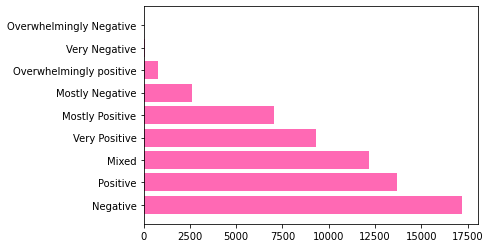

In [275]:
bar_values = train_data['D_reviews'].value_counts().tolist()
bar_keys = train_data['D_reviews'].value_counts().keys().tolist()
plt.barh(bar_keys,bar_values,color = "hotpink")

Stlpcovy graf hodnoteni

In [276]:
def format_D_release_date(data):        # uprava release date z datumoveho stringu na rok,
    data['D_release_date'] = pd.DatetimeIndex(data['D_release_date']).year

# def format_D_owners(data):      # uprava majitelov hier z intervalov na vyssiu hodnotu intervalu
#     data["D_owners"] = data["D_owners"].map({
#     '50,000,000 .. 100,000,000': 10,
#     '20,000,000 .. 50,000,000': 5,
#     '10,000,000 .. 20,000,000': 2,
#     '5,000,000 .. 10,000,000': 1,
#     '2,000,000 .. 5,000,000': 0.5,
#     '1,000,000 .. 2,000,000': 0.2,
#     '500,000 .. 1,000,000': 0.1,
#     '200,000 .. 500,000': 0.05,
#     '100,000 .. 200,000': 0.02,
#     '50,000 .. 100,000': 0.01,
#     '20,000 .. 50,000': 0.005,
#     '0 .. 20,000': 0.002
# })

def format_D_owners(data):         # uprava hodnotenia reviews do ciselnych hodnot od 0-8
    data.loc[data["D_owners"] == '100,000,000 .. 200,000,000',"D_owners"] = 20     
    data.loc[data["D_owners"] == "50,000,000 .. 100,000,000","D_owners"] = 10     
    data.loc[data["D_owners"] == "20,000,000 .. 50,000,000","D_owners"] = 5
    data.loc[data["D_owners"] == "10,000,000 .. 20,000,000","D_owners"] = 2          
    data.loc[data["D_owners"] == "5,000,000 .. 10,000,000","D_owners"] = 1
    data.loc[data["D_owners"] == "2,000,000 .. 5,000,000","D_owners"] = 0.5
    data.loc[data["D_owners"] == "1,000,000 .. 2,000,000","D_owners"] = 0.2
    data.loc[data["D_owners"] == "500,000 .. 1,000,000","D_owners"] = 0.1
    data.loc[data["D_owners"] == "200,000 .. 500,000","D_owners"] = 0.05
    data.loc[data["D_owners"] == "100,000 .. 200,000","D_owners"] = 0.02
    data.loc[data["D_owners"] == "50,000 .. 100,000","D_owners"] = 0.01
    data.loc[data["D_owners"] == "20,000 .. 50,000","D_owners"] = 0.005
    data.loc[data["D_owners"] == "0 .. 20,000","D_owners"] = 0.002
    
    
def format_D_reviews(data):         # uprava hodnotenia reviews do ciselnych hodnot od 0-8
    data.loc[data["D_reviews"] == "Overwhelmingly Negative","D_reviews"] = 0      
    data.loc[data["D_reviews"] == "Very Negative","D_reviews"] = 1
    data.loc[data["D_reviews"] == "Negative","D_reviews"] = 2               
    data.loc[data["D_reviews"] == "Mostly Negative","D_reviews"] = 3
    data.loc[data["D_reviews"] == "Mixed","D_reviews"] = 4
    data.loc[data["D_reviews"] == "Mostly Positive","D_reviews"] = 5
    data.loc[data["D_reviews"] == "Positive","D_reviews"] = 6
    data.loc[data["D_reviews"] == "Very Positive","D_reviews"] = 7
    data.loc[data["D_reviews"] == "Overwhelmingly positive","D_reviews"] = 8
    
def fill_empty_cells_with_value(data,column,value):
    data[column].fillna(value=value,inplace=True)    
        

format_D_release_date(train_data)
format_D_release_date(test_data)

format_D_reviews(train_data)
format_D_reviews(test_data)

format_D_owners(train_data)
format_D_owners(test_data)

fill_empty_cells_with_value(train_data,'score',train_data['score'].mean())
fill_empty_cells_with_value(train_data,'languages',train_data['languages'].mean())
fill_empty_cells_with_value(train_data,'publisher_est',train_data['publisher_est'].mean())
fill_empty_cells_with_value(train_data,'developer_est',train_data['developer_est'].mean())
fill_empty_cells_with_value(train_data,'coming_soon',True)
fill_empty_cells_with_value(train_data,'english',True)
fill_empty_cells_with_value(train_data,'is_single_player',True)
fill_empty_cells_with_value(train_data,'is_multi_player',True)
fill_empty_cells_with_value(train_data,'D_owners',True)



Cistenie a formatovanie dat. Premena release datu zo stringu na integer a zachytavanie iba hodnoty roku. Premapovanie D_owners zo stringoveho intervalu na mensie hodnoty. Prempaovanie D_reviews zo slovnych hodnoteni na ciselne hodnoty od 0 po 8. Vyplnanie prazdnych cellov medianom alebo boolean hodnotami.

In [277]:
import pandas as pd
import ast

def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

filtered_tags = ['2D','3D','VR']
# filtered_tags = ['2D','3D','Free to Play','VR']

train_data['D_tags'] = train_data['D_tags'].apply(ast.literal_eval).apply(lambda arr: intersection(arr,filtered_tags))
dummies = pd.get_dummies(pd.DataFrame(train_data['D_tags'].tolist()).stack()).groupby(level=0).sum()
train_data = pd.concat([train_data, dummies], axis=1)
train_data.drop(columns=['D_tags'], inplace=True)

test_data['D_tags'] = test_data['D_tags'].apply(ast.literal_eval).apply(lambda arr: intersection(arr,filtered_tags))
dummies = pd.get_dummies(pd.DataFrame(test_data['D_tags'].tolist()).stack()).groupby(level=0).sum()
test_data = pd.concat([test_data, dummies], axis=1)
test_data.drop(columns=['D_tags'], inplace=True)

Formatovanie a filtracia tagov. Tagy sme museli premenit na objekty a lambda funkciou vyberame len potrebne tagy ktore chceme. Pomocou get_dummies z filtrovanych tagov vytvarame separatne stlpce. Nasledne dropujeme stlpec tag ktory uz nepotrebujeme.

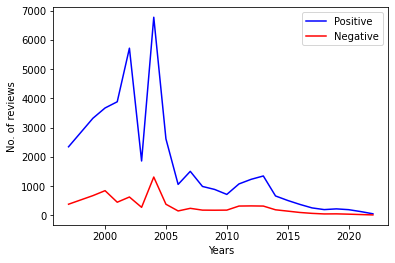

In [278]:
import plotly.graph_objects as go

train_data.sort_values('D_release_date')

years= train_data['D_release_date'].unique()

train_data = train_data[train_data['D_release_date'] > 1990]
train_data = train_data[train_data['positive'] < 10000]
train_data = train_data[train_data['negative'] < 10000]

group_date_reviews = train_data[['D_release_date','positive','negative']].groupby(['D_release_date'])

plt.plot(group_date_reviews['D_release_date'].mean(), group_date_reviews['positive'].mean(),color='blue',label='Positive')
plt.plot(group_date_reviews['D_release_date'].mean(), group_date_reviews['negative'].mean(),color='red', label='Negative')
plt.xlabel("Years")
plt.ylabel("No. of reviews")
plt.legend()


Chart graf hodnoteni

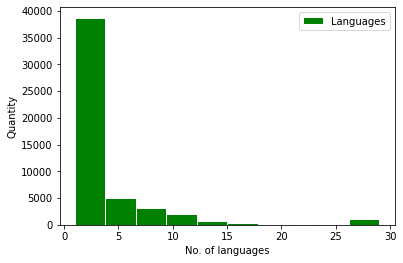

In [279]:
plt.hist(train_data['languages'],
         label="Languages",
         edgecolor="white",
         color="green")
plt.xlabel("No. of languages")
plt.ylabel("Quantity")
plt.legend()

Stlpcovy diagram jazykov

In [280]:
def fill_empty_cells_with_value(data,column,value):
    data[column].fillna(value=value,inplace=True)    
    
def drop_columns(data,columns):      # odstanenie stlpca
    data.drop(columns=columns,axis=1,inplace=True)
        
tables_to_drop = ['D_appid','D_name','D_genre','D_publisher','positive','negative','coming_soon','VYMAZAT_price','D_developer','publisher_est','developer_est']

drop_columns(test_data,tables_to_drop)
drop_columns(train_data,tables_to_drop)

# train_data.drop(train_data[train_data['is_free']==False].sample(frac=.8).index)



Vyber stlpcov pre dropovanie, ktore nemaju zmysel pre dalsi vyvoj.

In [281]:
def format_boolean_columns(data,columns):
    for column in columns:
        data[column] = data[column].astype(int)

format_boolean_columns(train_data,['english','is_free','self_published','has_dlc','has_website_linked','has_controller_support','is_single_player','is_multi_player','is_early_access','mature_content','Addictive','Beautiful','Classic','Competitive','Cult Classic','Difficult','Emotional','Emotional','Epic','Funny','Lore-Rich','Masterpiece','Replay Value','Short','Well-Written'])
format_boolean_columns(test_data,['english','self_published','has_dlc','has_website_linked','has_controller_support','is_single_player','is_multi_player','is_early_access','mature_content','Addictive','Beautiful','Classic','Competitive','Cult Classic','Difficult','Emotional','Emotional','Epic','Funny','Lore-Rich','Masterpiece','Replay Value','Short','Well-Written'])

fill_empty_cells_with_value(train_data,'D_release_date',train_data['D_release_date'].mean())
fill_empty_cells_with_value(train_data,'2D',0)
fill_empty_cells_with_value(train_data,'3D',0)
# fill_empty_cells_with_value(train_data,'Free to Play',0)
fill_empty_cells_with_value(train_data,'VR',0)
fill_empty_cells_with_value(train_data,'D_owners',0)


fill_empty_cells_with_value(test_data,'2D',0)
fill_empty_cells_with_value(test_data,'3D',0)
# fill_empty_cells_with_value(test_data,'Free to Play',0)
fill_empty_cells_with_value(test_data,'VR',0)
fill_empty_cells_with_value(test_data,'D_owners',0)


Vyplnanie prazdnych policok hodnotami. Formatovanie boolean hodnot na 0 a 1. Vyplnanie vsetkych tag stlpcov.

([<matplotlib.patches.Wedge at 0x7f6a3fc37810>,
 [Text(-0.9701393708259931, 0.7062786993626146, 'Single Player'),
  Text(0.8892944535651771, -0.6474220994515195, 'Multi Player')])

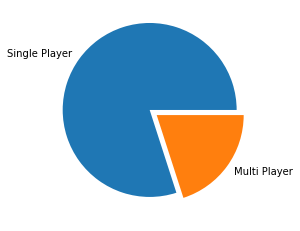

In [282]:
plt.pie(train_data['is_multi_player'].value_counts(),labels=['Single Player','Multi Player'], explode=[0.1,0])


Kolacovy graf single a multi player hier.

Text(0, 0.5, 'No. of released games')

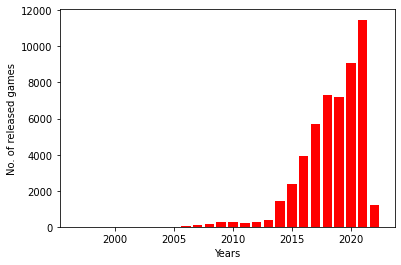

In [283]:
bar2_values = train_data['D_release_date'].value_counts().tolist()
bar2_keys = train_data['D_release_date'].value_counts().keys().tolist()
plt.bar(bar2_keys,bar2_values,color = "red")

plt.xlabel("Years")
plt.ylabel("No. of released games")

Stlpcovy graf releasovania hier pocas rokov

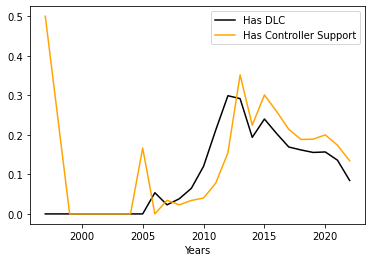

In [284]:
group2 = train_data[['D_release_date','has_dlc','has_controller_support']].groupby(['D_release_date'])

plt.plot(group2['D_release_date'].mean(), group2['has_dlc'].mean(),color='black',label='Has DLC')
plt.plot(group2['D_release_date'].mean(), group2['has_controller_support'].mean(),color='orange', label='Has Controller Support')
plt.xlabel("Years")
plt.legend()

Chart graf dvoch premennych odvyjajuci sa od casu

In [285]:
from mlxtend.preprocessing import minmax_scaling

columns_to_scale = ['D_owners','score','D_release_date','languages','D_reviews']

print(train_data['D_owners'].head())

minmax_scaling(train_data, columns=columns_to_scale)
minmax_scaling(test_data, columns=columns_to_scale)

1    1.0
2    1.0
3    1.0
5    1.0
7    2.0
Name: D_owners, dtype: float64


,D_owners,score,D_release_date,languages,D_reviews
0,0.00015,0.406250,0.809524,0.000000,0.333333
1,0.00000,1.000000,0.952381,0.000000,0.666667
2,0.00240,0.732530,0.809524,0.000000,0.500000
3,0.00015,0.672566,0.904762,0.285714,0.333333
4,0.00000,1.000000,0.809524,0.000000,0.666667
...,...,...,...,...,...
995,0.00000,0.666667,0.809524,0.000000,0.333333
996,0.00000,0.666667,0.857143,0.250000,0.333333
997,0.00015,0.571429,0.952381,0.000000,0.333333
998,0.00000,0.888889,0.952381,0.178571,0.666667


Skalovanie dat pomocou minmax scalingu. Tymto dosiahneme ze vsetky data v nasom datasete su v intervaloch od 0 po 1.

In [286]:
train_data.drop(train_data[train_data['is_free']==False].sample(frac=.8).index, inplace=True)

Dropovanie 80% hier ktore su platene pre vyrovnanost pomeru dat platenych a neplatenych. 

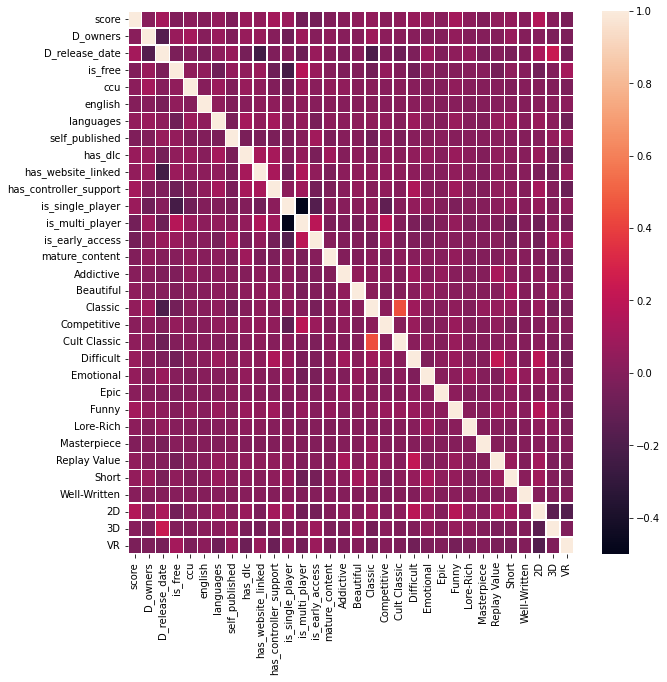

In [287]:
import seaborn as sn
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn

data_corr = train_data

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sn.heatmap(data_corr.corr(), linewidths=.7, ax=ax)
plt.show()

Vykreslenie koleracnej matici, ktora zobrazuje vztahy medzi jednotlivymi stlpacmi.

In [288]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

train, test_val = train_test_split(train_data, test_size=0.2)

input = np.asarray(train.drop(columns=['is_free'])).astype('float32')
output = np.asarray(train['is_free']).astype('float32')
test_x = np.asarray(test_data.drop(columns=['is_free'])).astype('float32')
test_y = np.asarray(test_data['is_free']).astype('float32')
valid_x = np.asarray(test_val.drop(columns=['is_free'])).astype('float32')
valid_y = np.asarray(test_val['is_free']).astype('float32')


Rozdelenie dat na validacne a trenovacie. Nasledne rozdelenie input a ouptut parametrov. Input dataset bez validacneho stlpca is_free a output cisto len s validacnym stlpcom. Tymto sposobom sme rozdelili aj testovacie aj validacne data.

Epoch 1/250
76/76 [==============================] - 1s 5ms/step - loss: 73.9940 - accuracy: 0.4237 - val_loss: 2.4830 - val_accuracy: 0.6437
Epoch 2/250
76/76 [==============================] - 0s 2ms/step - loss: 1.1711 - accuracy: 0.5557 - val_loss: 1.4817 - val_accuracy: 0.6128
Epoch 3/250
76/76 [==============================] - 0s 2ms/step - loss: 0.7987 - accuracy: 0.6168 - val_loss: 1.3385 - val_accuracy: 0.5823
Epoch 4/250
76/76 [==============================] - 0s 2ms/step - loss: 0.7058 - accuracy: 0.6320 - val_loss: 1.1063 - val_accuracy: 0.6304
Epoch 5/250
76/76 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.6402 - val_loss: 1.0776 - val_accuracy: 0.6437
Epoch 6/250
76/76 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6594 - val_loss: 1.0276 - val_accuracy: 0.6458
Epoch 7/250
76/76 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.6587 - val_loss: 1.0192 - val_accuracy: 0.6479
Epoch 8/250


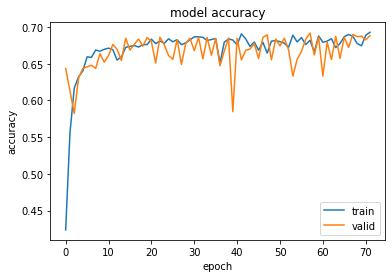

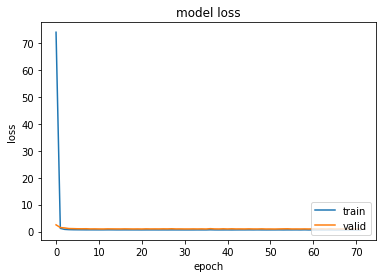

In [289]:

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD, Adagrad
from keras.callbacks import EarlyStopping

# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

model = Sequential()

model.add(Dense(20, activation='relu',input_shape=(input.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

# ///////////////

# ///////////////
# https://www.tensorflow.org/guide/keras/train_and_evaluate

early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
# training = model.fit(input, output,epochs=150,batch_size=100,validation_data=[valid_x,valid_y],callbacks=[early_stopping])
# training = model.fit(input, output,epochs=250,batch_size=50,validation_data=[valid_x,valid_y],callbacks=[early_stopping])
training = model.fit(input, output,epochs=250,batch_size=150,validation_data=[valid_x,valid_y],callbacks=[early_stopping])

# ///////////////

# /////////////
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

plt.plot(training.history[ 'accuracy' ])
plt.plot(training.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'valid' ], loc= 'lower right' )
plt.show()

plt.plot(training.history[ 'loss' ])
plt.plot(training.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'valid' ], loc= 'lower right' )
plt.show()

# /////////////

Trenovanie siete. Pouyili sme tri vrstvy. Dve relu a jednu sigmoid. Relu s poctom neuronov 20 a 10 a sigmoid s jednym neuronom. Aplikovali sme early_stoping pr eeliminovanie rizika pretrenovania siete. Pouzili sme optimalizator adam a loss funkciu binary_crossentropy. Vytvaranie modelu a vykreslovanie grafov bolo prebrate zo zdrojov spomenutých v kode.

32/32 [==============================] - 0s 1ms/step


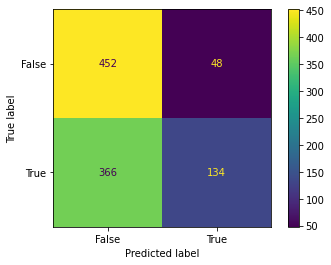

356/356 [==============================] - 0s 988us/step


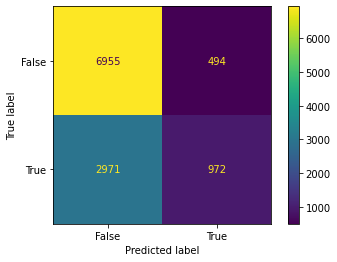

In [290]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test
predicted = np.round(model.predict(x_test), 0)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

actual = y_output
predicted = np.round(model.predict(x_input), 0)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Vykreslenie konfuznych matic
Zdroj : https://www.w3schools.com/python/python_ml_confusion_matrix.asp